# How to fit a rise time to an exponential instability with FIX

FIX is a small library to help isolate and fit exponential rise times in unstable systems with saturation.

In the following we show how to use the libary with the example of a dynamical instability in a particle accelerator which stops due to machine non-linearities.

Copyright CERN, Adrian Oeftiger, 2019

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

sns.set_context('talk', font_scale=1.4, rc={'lines.linewidth': 3})
sns.set_style('whitegrid', 
              {'grid.linestyle': ':', 'grid.color': 'red', 'axes.edgecolor': '0.5', 
               'axes.linewidth': 1.2, 'legend.frameon': True})

## The Data

We have stored the centroid motion of the unstable beam. Here we use both the $x$ and $x'$ data to obtain a purely positive signal to be fit exponentially. The quadrature signal $x'$ can also be obtained by using a `Hilbert` filter on $x$ (see e.g. `scipy.signal.Hilbert` with its imaginary part), e.g. for measurement data in a particle accelerator. In the present example, the data comes from a simulation with octupole amplitude detuning leading to a saturation effect.

In [2]:
mean_x = np.loadtxt('./example_mean_x.dat')
mean_xp = np.loadtxt('./example_mean_xp.dat')

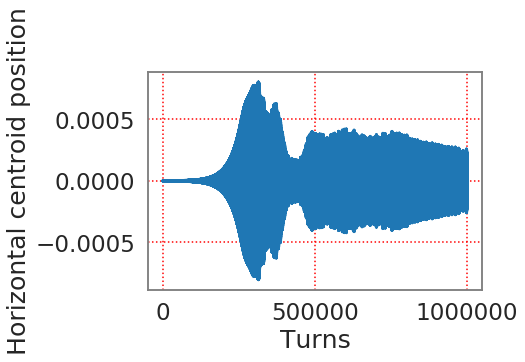

In [3]:
plt.plot(mean_x)
plt.xlabel('Turns')
plt.ylabel('Horizontal centroid position');

Let's construct the envelope or amplitude signal by using the quadrature signal $x'$:

In [4]:
beta_x = 92.759
signal_x = np.sqrt((mean_x)**2 + (beta_x * mean_xp)**2)

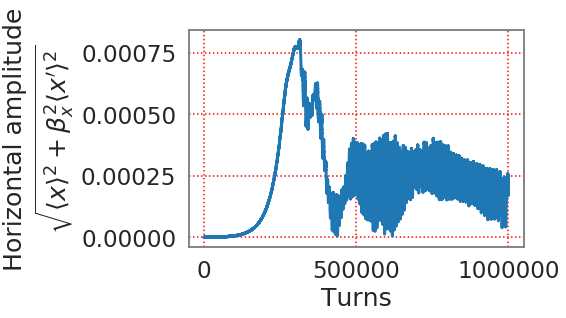

In [5]:
plt.plot(signal_x)
plt.xlabel('Turns')
plt.ylabel("Horizontal amplitude\n" + 
           r"$\sqrt{\langle x \rangle^2 + \beta_x^2\langle x'\rangle^2}$");

## The Instability Fit

Now let's use FIX in order to isolate the pure exponential instability from this positive signal and fit the rise time:

In [6]:
from FIX import fit_risetime

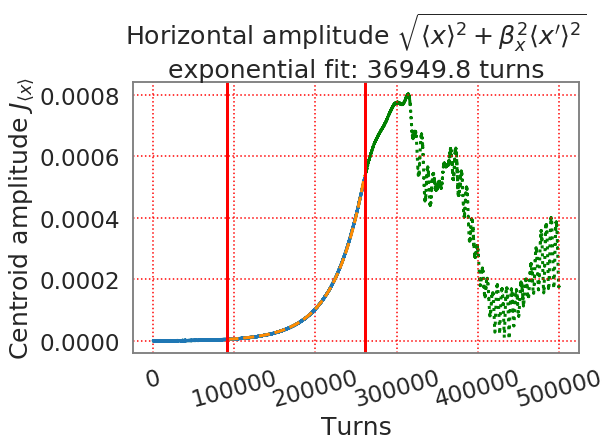

In [7]:
# numerical parameters
smoothing_window_size = 2000

plt.figure(figsize=(8, 5))

# set a minimum level below which the instability is not fit
min_level = 5 * np.max(signal_x[:1000])

# FIX me! --> returns the rise time in turns
rx = fit_risetime(
    signal_x, min_level=min_level, 
    smoothing_window_size=smoothing_window_size,
    matplotlib_axis=plt.gca()
)

# plotting
plt.title(r"Horizontal amplitude $\sqrt{\langle x \rangle^2 + \beta_x^2\langle x'\rangle^2}$" + 
          "\n" + r"exponential fit: {:.1f} turns".format(rx));
plt.ylabel(r'Centroid amplitude $J_{\langle x \rangle}$')
plt.xlabel('Turns')
for l in plt.gca().xaxis.get_ticklabels():
    l.set_rotation(15)
    l.set_horizontalalignment('center')

plt.plot(signal_x[:500000], ls=':', color='green', zorder=-10)

plt.savefig('fitting.png', bbox_inches='tight')

Note the isolated region between the red bars. The algorithm fits starting from a positive curvature point and stops when the curvature turns negative. Through this solid approach we avoid fitting the saturated part of the instability. The original signal is plotted in green. The fit itself is plotted with the orange broken line.

We obtain an exponential rise time of...

In [8]:
print ('... {:.1f} turns!'.format(rx))

... 36949.8 turns!
